In [9]:
%matplotlib inline

import sqlite3
import pandas as pd #for data frames
import numpy as np #numpy array operations
import nltk #natural lang processing, for processing text
import string
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import pickle
import seaborn as sn

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [14]:
with open("all_emb.dat", "rb") as f:
    cleaned_data = pickle.load(f)
final_tf_idf, bow_standardized_data, sent_vectors, tfidf_sent_vectors, final_scores = cleaned_data

In [13]:
from sklearn.model_selection import TimeSeriesSplit

def k_fold_cross_validation(x_1,y_1):
    li = list(range(0,16))
    
    #creating odd list of vals for 'k'
    neighbors = list(filter(lambda x: x%2 != 0,li))

    #empty list to hold CV scores/accuracy
    cv_scores = []

    
    #performing k-fold cross validation with Times Based Split
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto',n_jobs=-1)
        tscv = TimeSeriesSplit(n_splits=5)
        acc_sum=0
        cnt=0
        for train_index, test_index in tscv.split(x_1):
            X_train, X_test = x_1[train_index], x_1[test_index]
            Y_train, Y_test = y_1[train_index], y_1[test_index]
            knn.fit(X_train,Y_train)
            pred = knn.predict(X_test)
            acc = accuracy_score(Y_test, pred, normalize=True )*float(100)
            acc_sum=acc_sum+acc
            cnt=cnt+1
        cv_scores.append(acc_sum/cnt)
            
            
   
    # determining best k
    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)

    # plot misclassification error vs k 
    plt.plot(neighbors, cv_scores)

    for xy in zip(neighbors, np.round(cv_scores,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Accuracy Percentage')
    plt.show()

    print("the Accuracy for each k value is : ", np.round(cv_scores,3))
    print('*********************************************************************')
    print("optimal k value is: ",optimal_k)
    return optimal_k;

# Amazon reviews KNN classifier with TFIDF embeddings

In [16]:
x, y = final_tf_idf, final_scores
x_1, x_test, y_1, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [33]:
y_1 = np.array(y_1)
y_test = np.array(y_test)


The optimal number of neighbors is 13.


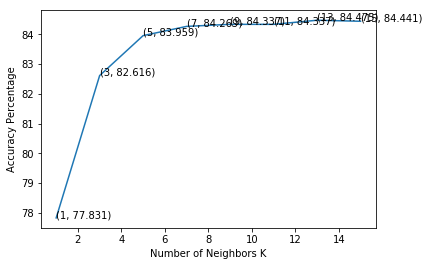

the Accuracy for each k value is :  [77.831 82.616 83.959 84.269 84.337 84.337 84.475 84.441]
*********************************************************************
optimal k value is:  13


In [20]:
optim_k_val = k_fold_cross_validation(x_1,y_1)

In [23]:
knn_optimal = KNeighborsClassifier(n_neighbors=optim_k_val)
knn_optimal.fit(x_1, y_1)
pred = knn_optimal.predict(x_test)

acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optim_k_val, acc))


The accuracy of the knn classifier for k = 13 is 86.965241%


# Amazon reviews KNN classifier with BOW embeddings

In [25]:
x, y = bow_standardized_data, final_scores
x_1, x_test, y_1, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [32]:
y_1 = np.array(y_1)
y_test = np.array(y_test)


The optimal number of neighbors is 3.


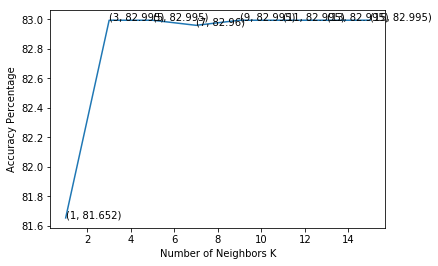

the Accuracy for each k value is :  [81.652 82.995 82.995 82.96  82.995 82.995 82.995 82.995]
*********************************************************************
optimal k value is:  3


In [34]:
optim_k_val = k_fold_cross_validation(x_1,y_1)

In [35]:
knn_optimal = KNeighborsClassifier(n_neighbors=optim_k_val)
knn_optimal.fit(x_1, y_1)
pred = knn_optimal.predict(x_test)

acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optim_k_val, acc))


The accuracy of the knn classifier for k = 3 is 85.360963%
